# <center> Webcam capture </center>


source : 

- https://www.geeksforgeeks.org/python-opencv-capture-video-from-camera/

- https://www.geeksforgeeks.org/face-detection-using-python-and-opencv-with-webcam/ 

In [1]:
import pandas as pd
import numpy as np

## Capture d'écran 

### Premier exemple de code

In [2]:
# # import the opencv library
# import cv2
  
  
# # define a video capture object
# vid = cv2.VideoCapture(0)
  
# while(True):
      
#     # Capture the video frame
#     # by frame
#     ret, frame = vid.read()
  
#     # Display the resulting frame
#     cv2.imshow('frame', frame)
      
#     # the 'q' button is set as the
#     # quitting button you may use any
#     # desired button of your choice
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break
  
# # After the loop release the cap object
# vid.release()
# # Destroy all the windows
# cv2.destroyAllWindows()

## Deuxième exemple de code 

In [3]:
import cv2

cam = cv2.VideoCapture(0)

cv2.namedWindow("test")

img_counter = 0

while True:
    ret, frame = cam.read()
    if not ret:
        print("failed to grab frame")
        break
    cv2.imshow("test", frame)

    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        img_name = "opencv_frame_{}.png".format(img_counter)
        cv2.imwrite(img_name, frame)
        print("{} written!".format(img_name))
        img_counter += 1

cam.release()

cv2.destroyAllWindows()

opencv_frame_0.png written!
opencv_frame_1.png written!
Escape hit, closing...


## Photo sans masque

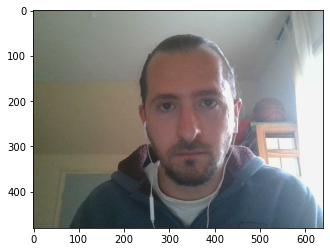

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as img

image = img.imread('opencv_frame_0.png')
plt.imshow(image)
plt.show()

## Photo avec masque

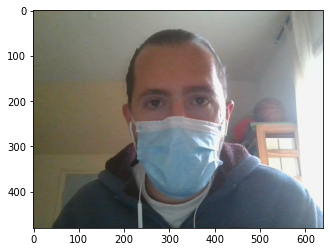

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as img

image = img.imread('opencv_frame_1.png)
plt.imshow(image)
plt.show()

## Détection 

In [7]:
import tensorflow as tf

model = tf.keras.models.load_model('model.h5')

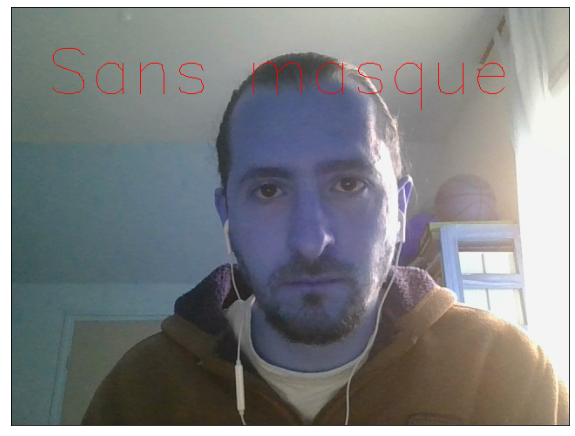

Sans masque


In [12]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions

img_path = 'opencv_frame_0.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)



preds = model.predict(x)
pred = np.argmax(preds)
if pred == 0 :
  resultat = "Sans masque"
else :
  resultat = "Avec masque"

# test d'un label à l'image

img_pred = cv2.imread(img_path)
img = cv2.putText(img_pred, resultat, (40, 100), cv2.FONT_HERSHEY_SIMPLEX, 2.5, (255,0,0))
plt.figure(figsize=(10,10))
plt.subplot()
plt.xticks([])
plt.yticks([])
plt.imshow(img)
plt.show()

print(resultat)

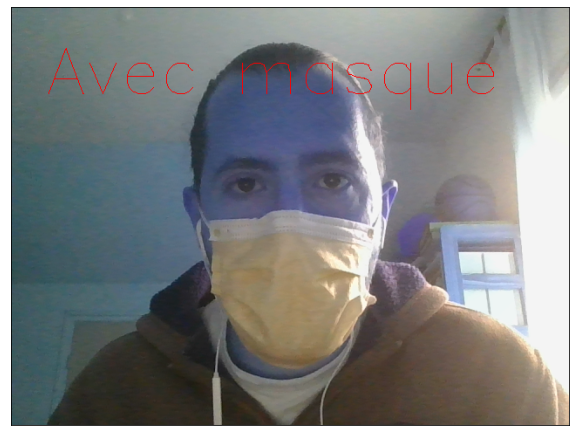

Avec masque


In [8]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions

img_path = 'opencv_frame_1.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)



preds = model.predict(x)
pred = np.argmax(preds)
if pred == 0 :
  resultat = "Sans masque"
else :
  resultat = "Avec masque"

# test d'un label à l'image

img_pred = cv2.imread(img_path)
img = cv2.putText(img_pred, resultat, (40, 100), cv2.FONT_HERSHEY_SIMPLEX, 2.5, (255,0,0))
plt.figure(figsize=(10,10))
plt.subplot()
plt.xticks([])
plt.yticks([])
plt.imshow(img)
plt.show()

print(resultat)

---

## Conclusion 

Pour avoir testé plusieurs images différentes, nous avons conclu que notre modèle n'est pas aussi performant que prévu : il faudrait continuer à l'améliorer, lui fournir davantages d'images ou de modifier les paramètres pour obtenir de meilleurs résultats. En effet, il suffit que la luminosité ou le contraste change pour que le modèle se trompe aisément. 